In [39]:
import pandas as pd
import numpy as np
import urllib.request
import os
import nltk, re
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

In [4]:
df_characters=pd.read_csv('ZeldaBotW_nodes_w_attributes_enriched.csv')

In [5]:
partition={'Baddek': 0,
 'Bamboo': 0,
 'Banji': 0,
 'Baumar': 0,
 'Bayge': 1,
 'Beedle': 1,
 'Bolson': 2,
 'Brigo': 3,
 'Cambo': 4,
 'Chabi': 0,
 'Chork': 4,
 'Chumin': 4,
 'Dabi': 0,
 'Daruk': 1,
 'Dauntless': 1,
 'Dinraal': 13,
 'Ena': 13,
 'Endai': 6,
 'Epona': 6,
 'Farosh': 13,
 'Fyson': 2,
 'Goflam': 4,
 'Greyson': 2,
 'Heehl': 1,
 'Hestu': 4,
 'Hudson': 2,
 'Hylia': 8,
 'Kabetta': 1,
 'Kanny': 9,
 'Kapson': 2,
 'Karson': 0,
 'Kass': 1,
 'Kenyo': 10,
 'Kilton': 0,
 'Link': 4,
 'Meeshy': 4,
 'Mei': 11,
 'Mils': 4,
 'Mina': 4,
 'Mipha': 11,
 'Misko': 4,
 'Naydra': 10,
 'Nazbi': 1,
 'Pelison': 2,
 'Pikango': 6,
 'Revali': 1,
 'Rhondson': 2,
 'Rik': 6,
 'Savelle': 0,
 'Sho': 0,
 'Sorelia': 1,
 'Spoone': 10,
 'Toren': 0,
 'Totsuna': 4,
 'Tye': 9,
 'Urbosa': 1,
 'Yammo': 0,
 'Princess Zelda': 1,
 'Zyle': 4,
 'Naddon': 9,
 'Pitar': 4,
 'Dah Hesho': 10,
 'Dmitri': 6,
 'Gleema': 6,
 'Jana': 6,
 'Kah Mael': 8,
 'Kaifa': 6,
 "Ke'nai Shakah": 8,
 'Lonni': 1,
 'Nell': 3,
 'Tenne': 6,
 'Tutsuwa Nima': 8,
 'Ze Kasho': 8,
 'Grant\\u00e9': 6,
 'Moggs': 2,
 'Monari': 2,
 'Ritaag Zumo': 8,
 "Tu Ka'loh": 8,
 'Hoz': 0,
 'Jerrin': 6,
 'Katosa Aug': 8,
 'Nobo': 4,
 'Robbie': 6,
 'Zuna Kai': 8,
 'Glendo': 10,
 'King Rhoam': 1,
 'Etsu Korima': 8,
 'Old Man': 10,
 'Rohta Chigah': 8,
 'Ruvo Korbah': 8,
 'Yowaka Ita': 8,
 'Aliza': 4,
 'Benny': 4,
 'Calamity Ganon': 8,
 'Canni': 6,
 'Dah Kaso': 8,
 'Dai': 10,
 'Gotter': 3,
 'Haite': 4,
 'Katah Chuki': 8,
 'Myti': 4,
 'Namika Ozz': 8,
 'Noya Neha': 8,
 "Saas Ko'sah": 8,
 'Toffa': 1,
 'Trott': 4,
 'Branli': 4,
 'Konba': 4,
 "Maag No'rah": 8,
 'Mijah Rokee': 8,
 'Shira Gomar': 8,
 'Yunobo': 1,
 'Ashe': 6,
 'Axyl': 2,
 'Bohrin': 2,
 'Boldon': 2,
 'Breen': 6,
 'Dayto': 3,
 'Dorill': 2,
 'Douma': 11,
 'Drak': 1,
 'Dugby': 1,
 'Fin': 4,
 'Gaile': 4,
 'Gorae Torr': 8,
 'Grapp': 1,
 'Jengo': 2,
 'Kairo': 1,
 'Kish': 6,
 'Offrak': 2,
 'Russ': 4,
 'Shamae': 6,
 'Aji': 2,
 'Bargoh': 1,
 'Bludo': 1,
 'Fugo': 1,
 'Krane': 1,
 'Pyle': 1,
 'Rogaro': 1,
 'Rohan': 1,
 'Slergo': 1,
 'Akrah': 4,
 'Daag Chokah': 8,
 'Garshon': 4,
 'Ketoh Wawai': 8,
 'Kuhn Sidajj': 8,
 'Maag Halan': 8,
 'Onya': 4,
 'Zumi': 4,
 'Chio': 4,
 'Damia': 4,
 'Daz': 4,
 'Kula': 4,
 'Maca': 4,
 'Natie': 4,
 'Peeks': 4,
 'Pepp': 4,
 'The Great Deku Tree': 4,
 'Walton': 4,
 'Blynne': 4,
 'Jini': 4,
 'Loone': 4,
 'Malanya': 1,
 'Pumaag Nitae': 8,
 'Roscoe': 4,
 'Shae Katha': 8,
 'Shoqa Tatone': 8,
 'Barta': 13,
 'Calisa': 4,
 'Eighth Heroine': 14,
 'Gartan': 4,
 'Lukan': 4,
 'Seven Heroines': 14,
 'Anche': 4,
 'Benja': 4,
 'Dila Maag': 8,
 'Dillie': 4,
 'Jora': 4,
 'Keive Tala': 8,
 'Konora': 4,
 "Korsh O'hu": 8,
 'Kyra': 4,
 'Misae Suma': 8,
 'Patricia': 13,
 'Pokki': 4,
 'Raqa Zunzo': 8,
 'Riju': 13,
 'Shabonne': 4,
 'Strade': 13,
 'Sudrey': 13,
 'Takama Shiri': 8,
 'Tali': 4,
 'Tera': 6,
 'Tho Kayu': 8,
 'Ardin': 14,
 'Ashai': 14,
 'Aurie Taamu': 14,
 'Babi': 13,
 'Bertri': 13,
 'Bozai': 14,
 'Buliara': 13,
 'Calyban': 14,
 'Cara': 14,
 'Dalia': 14,
 'Danda': 14,
 'Deltan': 4,
 'Dina': 14,
 'Dorrah': 13,
 'Essa': 4,
 'Estan': 14,
 'Fegran': 4,
 'Frelly': 4,
 'Frita': 14,
 'Furosa': 4,
 'Greta': 4,
 'Isha': 14,
 'Jules': 14,
 'Kalani': 14,
 'Katta': 13,
 'Kohm': 4,
 'Kotta': 13,
 'Laine': 4,
 'Lashley': 13,
 'Leena': 13,
 'Liana': 13,
 'Lorn': 14,
 'Lyndae': 13,
 'Makure': 14,
 'Malena': 13,
 'Marta': 13,
 'Merina': 13,
 'Muava': 13,
 'Nali': 13,
 'Nellie': 14,
 'Olu': 4,
 'Padda': 13,
 'Pasha': 14,
 'Pearle': 14,
 'Ploka': 13,
 'Pritana': 13,
 'Pyra': 14,
 'Reeza': 13,
 'Rima': 13,
 'Risa': 14,
 'Romah': 4,
 'Rotana': 14,
 'Saula': 14,
 'Smaude': 13,
 'Spera': 14,
 'Sumati': 14,
 'Tauma': 4,
 'Teake': 13,
 'Traysi': 13,
 'Yaido': 14,
 'Emri': 4,
 'Guy': 4,
 'Kachoo': 4,
 'Maike': 14,
 'Nobiro': 4,
 'Ripp': 4,
 'Robsten': 4,
 'Shaillu': 4,
 'Vilia': 4,
 'Canolo': 0,
 'Flaxel': 0,
 'Keeha Yoog': 8,
 'Kema Kosassa': 8,
 'Kihiro Moh': 8,
 'Master Kohga': 6,
 'Maypin': 4,
 'Moza': 4,
 'Oliff': 0,
 'Palme': 0,
 'Piaffe': 4,
 'Pirou': 4,
 'Sasa Kai': 8,
 'Sesami': 0,
 'Suma Sahma': 8,
 'Falmark': 0,
 'Teba': 15,
 'Tulin': 15,
 'Goma Asaagh': 8,
 'Hia Miu': 8,
 'Kiah Toza': 8,
 'Mozo Shenno': 8,
 'Noe Rajee': 8,
 'Qaza Tokki': 8,
 'To Quomo': 8,
 'Danton': 4,
 'Harlow': 4,
 'Harry (Breath of the Wild)': 12,
 'Mary (Breath of the Wild)': 12,
 'Monkton': 12,
 'Ariane': 4,
 'Cree': 15,
 'Galli': 4,
 'Geggle': 4,
 'Genli': 15,
 'Gesane': 10,
 'Kaysa': 6,
 'Kheel': 15,
 'Kotts': 15,
 'Lanno Kooh': 8,
 'Lester': 4,
 'Molli': 15,
 'Notts': 15,
 'Pondo': 4,
 'Rona Kachta': 8,
 "Tena Ko'sah": 8,
 'Amali': 15,
 'Bedoli': 4,
 'Cecili': 4,
 'Harth': 15,
 'Huck': 1,
 'Kaneli': 15,
 'Laissa': 4,
 'Mazli': 4,
 'Saki': 15,
 'Verla': 1,
 'Gruve': 11,
 'Ledo': 11,
 'Tona': 11,
 'Tula': 11,
 'Dagah Keek': 8,
 'Sidon': 11,
 'Soh Kofi': 8,
 'Torfeau': 3,
 'Bazz': 11,
 'Cleff': 11,
 'Dento': 11,
 'Dunma': 11,
 'Finley': 11,
 'Fronk': 11,
 'Gaddison': 11,
 'Jiahto': 11,
 'Kayden': 11,
 'Keye': 11,
 'King Dorephan': 11,
 'Kodah': 11,
 'Laflat': 11,
 'Laruta': 11,
 'Marot': 11,
 'Muzu': 11,
 'Reagah': 11,
 'Rivan': 11,
 'Seggin': 11,
 'Trello': 11,
 'Tumbo': 11,
 'Shai Yota': 8,
 'Ami': 5,
 'Izra': 5,
 'Quince': 4,
 'Satty': 4,
 'Yolero': 5,
 "Jitan Sa'mi": 8,
 "Tahno O'ah": 8,
 'Agus': 4,
 'Celessa': 6,
 'Garill': 4,
 'Joute': 4,
 'Flavi': 4,
 'Garini': 4,
 'Muwo Jeem': 8,
 'Perda': 14,
 'Tawa Jinn': 8,
 'Teli': 4,
 'Wabbin': 14,
 'Amira': 7,
 'Aster': 7,
 'Azu': 7,
 'Clavia': 7,
 'Dantz': 4,
 'Horned Statue': 7,
 'Ivee': 7,
 'Karin': 7,
 'Koyin': 4,
 'Leop': 4,
 'Manny (Breath of the Wild)': 4,
 'Medda': 7,
 'Nack': 7,
 'Narah': 7,
 'Nebb': 7,
 'Nikki': 7,
 'Prima': 4,
 'Pruce': 7,
 'Purah': 6,
 'Ralera': 4,
 'Reede': 7,
 'Rhodes': 4,
 'Sayge': 7,
 'Sefaro': 7,
 'Seldon': 4,
 'Senna': 7,
 'Sophie': 4,
 'Symin': 6,
 'Tamana': 4,
 'Teebo': 7,
 'Thadd': 4,
 'Tokk': 4,
 'Uma': 4,
 'Armes': 4,
 'Chessica': 4,
 'Cloyne': 4,
 'Kiana': 4,
 'Kinov': 4,
 'Numar': 4,
 'Rozel': 4,
 'Sebasto': 4,
 'Chaas Qeta': 8,
 'Korgu Chideh': 8,
 'Mimo': 4,
 'Anly': 6,
 'Brokka': 4,
 'Bugut': 6,
 'Cima': 4,
 'Cotera': 6,
 'Darton': 4,
 'Domidak': 4,
 'Giro': 4,
 'Hino': 4,
 'Prissen': 4,
 'Qukah Nata': 8,
 'Rensa': 4,
 'Sagessa': 4,
 'Shibo': 4,
 'Tasseren': 4,
 'Cado': 6,
 'Claree': 6,
 'Cottla': 6,
 'Dorian': 6,
 'Impa': 6,
 'Koko': 6,
 'Lakna Rokee': 8,
 'Lasli': 6,
 'Mellie': 6,
 'Nanna': 6,
 'Olkin': 6,
 'Ollie': 6,
 'Paya': 6,
 'Rola': 6,
 'Steen': 6,
 'Trissa': 6,
 'Black Bokoblin': 0,
 'Black Lizalfos': 1,
 'Black Moblin': 0,
 'Blizzrobe': 0,
 'Blue Bokoblin': 0,
 'Blue Lizalfos': 1,
 'Blue-Maned Lynel': 10,
 'Blue Moblin': 3,
 'Bokoblin': 0,
 'Chuchu': 0,
 'Cursed Bokoblin': 0,
 'Cursed Lizalfos': 1,
 'Cursed Moblin': 0,
 'Decayed Guardian': 3,
 'Electric Chuchu': 13,
 'Electric Keese': 10,
 'Electric Lizalfos': 1,
 'Electric Wizzrobe': 4,
 'Fire-Breath Lizalfos': 1,
 'Fire Chuchu': 1,
 'Fire Keese': 10,
 'Fire Wizzrobe': 1,
 'Forest Octorok': 9,
 'Frost Pebblit': 2,
 'Golden Bokoblin': 0,
 'Golden Lizalfos': 1,
 'Golden Lynel': 10,
 'Golden Moblin': 0,
 'Guardian Stalker': 3,
 'Guardian Scout I': 4,
 'Guardian Scout II': 4,
 'Guardian Scout IV': 4,
 'Guardian Skywatcher': 4,
 'Guardian Turret': 4,
 'Ice Chuchu': 1,
 'Ice Keese': 10,
 'Ice-Breath Lizalfos': 1,
 'Ice Wizzrobe': 2,
 'Igneo Pebblit': 6,
 'Keese': 10,
 'Lizalfos': 1,
 'Lynel': 10,
 'Meteo Wizzrobe': 6,
 'Moblin': 0,
 'Rock Octorok': 9,
 'Silver Bokoblin': 0,
 'Silver Lizalfos': 1,
 'Silver Lynel': 10,
 'Silver Moblin': 0,
 'Sky Octorok': 9,
 'Snow Octorok': 9,
 'Stalizalfos': 1,
 'Stalkoblin': 0,
 'Stalmoblin': 1,
 'Stone Pebblit': 4,
 'Treasure Octorok': 9,
 'Water Octorok': 9,
 'White-Maned Lynel': 10,
 'Yiga Blademaster': 6,
 'Yiga Footsoldier': 6,
 'Stone Talus': 0,
 'Stone Talus (Junior)': 0,
 'Stone Talus (Senior)': 0,
 'Stone Talus (Luminous)': 0,
 'Stone Talus (Rare)': 0,
 'Igneo Talus': 1,
 'Frost Talus': 10,
 'Hinox': 3,
 'Blue Hinox': 4,
 'Black Hinox': 0,
 'Stalnox': 1,
 'Molduga': 13,
 'Igneo Talus Titan': 13,
 'Molduking': 13,
 'Windblight Ganon': 1,
 'Fireblight Ganon': 1,
 'Thunderblight Ganon': 1,
 'Waterblight Ganon': 1,
 'Monk Maz Koshia': 6,
 'Dark Beast Ganon': 1}

In [38]:
# combine the ZeldaWiki pages into one long list per community.
count=0
for com in set(partition.values()) :
    count=count+1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    for char in list_nodes:
        try:
            roletext = open('./ZeldaCharacterFile-Text/'+char+'.txt').read()
            roletext = re.sub(r'{|}','',roletext)
            comfile=open('./zeldaCommunityCorpus/'+'community'+str(count)+'.txt','a')
            comfile.write(roletext)
        except:
            pass

In [41]:
# find the top 5 terms within each community
compath='./zeldaCommunityCorpus/'
comfiles=os.listdir(compath)

tokenizer=WordPunctTokenizer()
lemmatizer=nltk.WordNetLemmatizer()

com_freq=[]
for file in comfiles:
    if not os.path.isdir(file):
        text=open(compath+file).read()

        # tokenize
        tokens = tokenizer.tokenize(text)
        # exclude punc and stopwords
        cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]
        # text version
        tktext=nltk.Text(cleartokens)

        fdist= nltk.FreqDist(tktext)
        
        com_freq.append({'race':file[:-4],'freqItem':fdist.most_common(5)})

In [42]:
com_freq

[{'race': 'community9',
  'freqItem': [('wild', 63),
   ('away', 63),
   ('n', 63),
   ('who', 63),
   ('with', 63)]},
 {'race': 'community8',
  'freqItem': [('wild', 18),
   ('breath', 18),
   ('the', 18),
   ('character', 18),
   ('of', 18)]},
 {'race': 'community6',
  'freqItem': [('wild', 3),
   ('breath', 3),
   ('the', 3),
   ('character', 3),
   ('of', 3)]},
 {'race': 'community7',
  'freqItem': [('the', 45), ('of', 45), ('in', 45), ('n', 45), ('is', 44)]},
 {'race': 'community5',
  'freqItem': [('the', 137),
   ('of', 137),
   ('in', 137),
   ('n', 137),
   ('is', 135)]},
 {'race': 'community4',
  'freqItem': [('wild', 9), ('breath', 9), ('the', 9), ('and', 9), ('to', 9)]},
 {'race': 'community1',
  'freqItem': [('the', 39), ('of', 39), ('in', 39), ('n', 39), ('and', 35)]},
 {'race': 'community3',
  'freqItem': [('that', 18),
   ('the', 18),
   ('and', 18),
   ('to', 18),
   ('of', 18)]},
 {'race': 'community2',
  'freqItem': [('the', 52), ('of', 52), ('in', 52), ('n', 52), ('a

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

**TF (Term Frequency) :**
the count of a word present in a sentence

capturing the importance of the word irrespective of the length of the document.

**IDF (Inverse Document Frequency):**
IDF of each word is the log of the ratio of the total number of rows to the number of rows in a particular document in which that word is present.

measure the rareness of a term.


In [48]:
# calculate TF for every community
cv = CountVectorizer()

for file in comfiles:
    if not os.path.isdir(file):
        text=open(compath+file).read()
        word_count_vector = cv.fit_transform([text])
        
        tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
        print(tf)

   abandoned  ability  able  about  above  absorb  absorbing  across  act  \
0          1        1     1     49      1       2          1       1    1   

   action  ...  yoog  yota  young  yowaka  ze  zelda  zumo  zuna  zunzo  \
0       2  ...     1     1      2       1   1      2     1     1      1   

   ˈhaɪliə  
0        1  

[1 rows x 942 columns]
   abandoned  able  about  absent  accepts  according  accuse  action  \
0          1     1     10       1        1          1       1       1   

   adamant  add  ...  woman  wonder  wondering  word  work  worker  world  \
0        1    1  ...      3       3          1     2     2       1      1   

   would  writes  written  
0      2       1        1  

[1 rows x 819 columns]
   about  agrees  also  and  area  ask  asked  asking  asks  at  ...  what  \
0      1       1     1    1     1    1      1       1     1   1  ...     1   

   when  where  which  who  wild  will  wish  with  zora  
0     1      1      1    1     3     1     1  

In [50]:
# calculate IDF for every community
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(cleartokens)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_vectorizer.idf_})
print(idf)

    feature_name  idf_weights
0          about     5.273188
1      adventure     5.560870
2    adventurous     5.560870
3          after     5.273188
4           also     5.966335
..           ...          ...
158          who     5.273188
159         wife     5.560870
160         wild     5.273188
161         will     5.966335
162         with     5.273188

[163 rows x 2 columns]


In [51]:
# calculate TF-IDF for every community
tf_idf = pd.DataFrame(X.toarray() ,columns=cv.get_feature_names())
print(tf_idf)

     about  adventure  adventurous  after  also   an  ancestor  and  apparent  \
0      0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
1      0.0        0.0          1.0    0.0   0.0  0.0       0.0  0.0       0.0   
2      0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
3      0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
4      0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
..     ...        ...          ...    ...   ...  ...       ...  ...       ...   
281    0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
282    0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
283    0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
284    0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   
285    0.0        0.0          0.0    0.0   0.0  0.0       0.0  0.0       0.0   

     are  ...  weren  when 

<ipython-input-53-d01d7d61b920>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num/2,2,i)


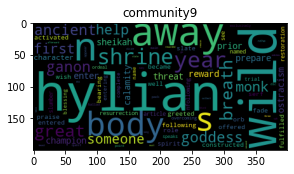

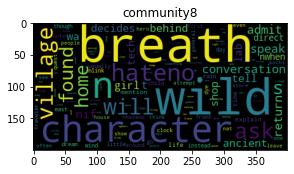

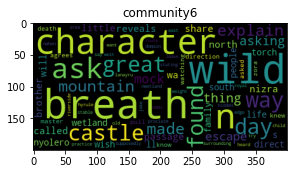

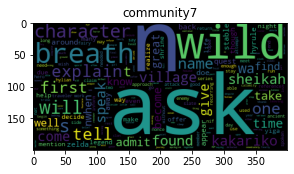

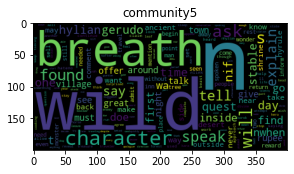

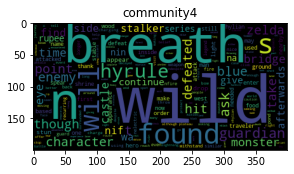

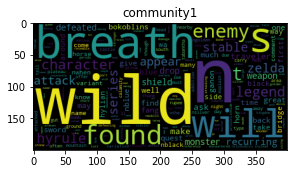

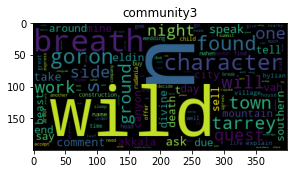

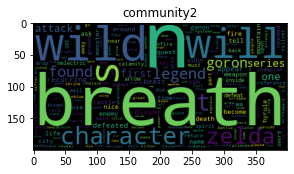

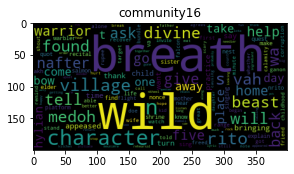

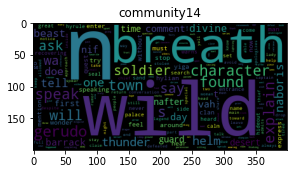

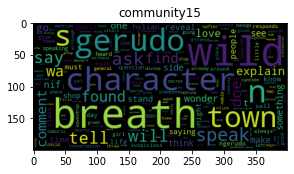

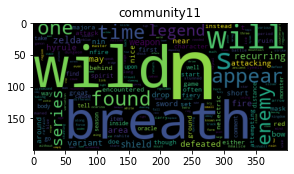

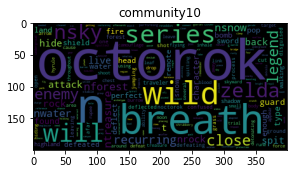

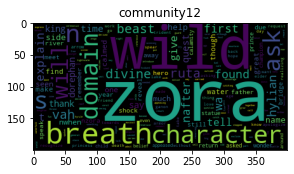

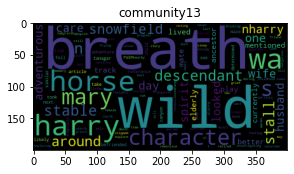

In [53]:
# Create a wordcloud for each community.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num = len(comfiles)
i = 0
for file in comfiles:
    if not os.path.isdir(file):
        text = open(compath+file).read()
        tokens = tokenizer.tokenize(text)
        cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]
        
        wc = WordCloud(collocations = False).generate(' '.join(cleartokens))
        
        plt.figure(figsize=(10,50))
        i=i+1
        plt.subplot(num/2,2,i)
        plt.title(file[:-4])
        plt.imshow(wc)